# Linear_Regression

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
learning_rate = 0.001
training_epoch = 1000
show_step = 50

In [4]:
train_X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [25]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(tf.truncated_normal([1], stddev = 0.1))
b = tf.Variable(tf.truncated_normal([1], stddev = 0.1))

In [26]:
y_pred = X * W + b

In [27]:
cost = tf.reduce_sum(tf.pow(Y - y_pred, 2)) / (2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [29]:
init = tf.initialize_all_variables()

Epoch:   50, cost = 0.115465209, W:  0.334134, b: 0.085508138
Epoch:  100, cost = 0.107927941, W:  0.349155, b: 0.092021935
Epoch:  150, cost = 0.107455887, W:  0.350178, b: 0.096532837
Epoch:  200, cost = 0.107083820, W:  0.349748, b: 0.100812100
Epoch:  250, cost = 0.106719226, W:  0.349170, b: 0.105044134
Epoch:  300, cost = 0.106359251, W:  0.348580, b: 0.109248251
Epoch:  350, cost = 0.106003642, W:  0.347992, b: 0.113426819
Epoch:  400, cost = 0.105652340, W:  0.347407, b: 0.117579959
Epoch:  450, cost = 0.105305292, W:  0.346825, b: 0.121708058
Epoch:  500, cost = 0.104962416, W:  0.346248, b: 0.125811085
Epoch:  550, cost = 0.104623675, W:  0.345674, b: 0.129889488
Epoch:  600, cost = 0.104289025, W:  0.345102, b: 0.133943200
Epoch:  650, cost = 0.103958473, W:  0.344535, b: 0.137971684
Epoch:  700, cost = 0.103631899, W:  0.343971, b: 0.141975969
Epoch:  750, cost = 0.103309251, W:  0.343410, b: 0.145956054
Epoch:  800, cost = 0.102990538, W:  0.342853, b: 0.149911851
Epoch:  

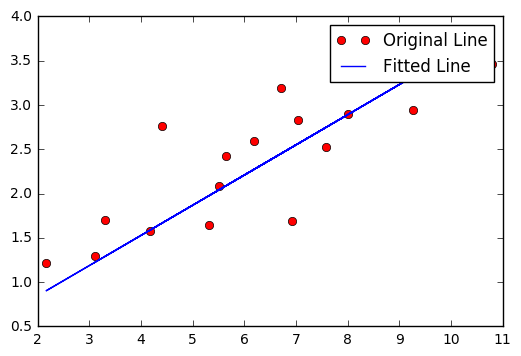

In [31]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(training_epoch):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        if (i + 1) % show_step == 0:
            cur_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print "Epoch: %4d, cost = %.9f, W: %9f, b: %.9f" %(i+1, cur_cost, sess.run(W), sess.run(b))
            
    print "Optimizer Finished"
    tr_cost = sess.run(cost, feed_dict={X: x, Y: y})
    print "cost = %9f, W: %.9f, b: %.9f" %(tr_cost, sess.run(W), sess.run(b))
    
    plt.plot(train_X, train_Y, "ro", label = "Original Line")
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label = "Fitted Line")
    plt.legend()
    plt.show()